# Exploratory Data Analysis


This notebook conducts an exploratory data analysis (EDA) on two datasets from the [IBM Transactions for Anti-Money Laundering (AML) - Kaggle](https://www.kaggle.com/datasets/ealtman2019/ibm-transactions-for-anti-money-laundering-aml) dataset. The datasets represent transactions with **high incidence (HI) of money laundering** and **low incidence (LI) of money laundering**. The goal of this analysis is to understand the distribution of transaction features, compare positive and negative labels, and examine statistical associations between features and money laundering risk.  


**Affiliations:** TD Bank, Columbia University  
**Last updated:** 2025-02-11

---

#### Objectives
- Compare the distribution of features between transactions flagged as **money laundering** vs. **non-money laundering**.
- Identify key differences between the **HI** and **LI** datasets.
- Analyze statistical relationships between features and the target label.
- Generate insights to inform potential fraud detection models.

#### Data Sources
- **Source:** [IBM Transactions for Anti-Money Laundering (AML) - Kaggle](https://www.kaggle.com/datasets/ealtman2019/ibm-transactions-for-anti-money-laundering-aml)
- **HI Dataset:** Transactions with a higher prevalence of money laundering cases.
- **LI Dataset:** Transactions with a lower prevalence of money laundering cases.

#### Next Steps
- Following this EDA, the findings can guide feature engineering and model selection for detecting suspicious transactions.  

<br>

---

# Data loading and packages

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df_hi = pd.read_csv("../data/HI-Small_Trans.csv")
df_li = pd.read_csv("../data/LI-Small_Trans.csv")

Get length of dataset and percent of money-laundering cases in each file (HI and LI)

In [14]:
print("HI...")
print(f"N obs: {len(df_hi)}")
print(f"N laundering: {len(df_hi[df_hi['Is Laundering']==1])}") 
print(f"Percent laundering cases: {round(len(df_hi[df_hi['Is Laundering']==1])/len(df_hi)*100,5)}%")
print("LI...")
print(f"N obs: {len(df_li)}")
print(f"N laundering: {len(df_li[df_li['Is Laundering']==1])}") 
print(f"Percent laundering cases: {round(len(df_li[df_li['Is Laundering']==1])/len(df_li)*100,5)}%")

HI...
N obs: 5078345
N laundering: 5177
Percent laundering cases: 0.10194%
LI...
N obs: 6924049
N laundering: 3565
Percent laundering cases: 0.05149%


In [15]:
df_hi.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0


In [16]:
# Summary statistics
print("\nSummary Statistics:")
print(df_hi.describe())

# Check for missing values
print("\nMissing Values:")
print(f"HI: {df_hi.isnull().sum()}")
print(f"LI: {df_li.isnull().sum()}")

# Check for duplicate rows
print("\nDuplicate Rows:")
print(f"HI: {df_hi.duplicated().sum()}")
print(f"LI: {df_li.duplicated().sum()}")

df_hi.drop_duplicates(inplace=True)
df_li.drop_duplicates(inplace=True)


Summary Statistics:
          From Bank       To Bank  Amount Received   Amount Paid  \
count  5.078345e+06  5.078345e+06     5.078345e+06  5.078345e+06   
mean   4.573057e+04  6.574456e+04     5.988726e+06  4.509273e+06   
std    8.176562e+04  8.409299e+04     1.037183e+09  8.697728e+08   
min    1.000000e+00  1.000000e+00     1.000000e-06  1.000000e-06   
25%    1.190000e+02  4.259000e+03     1.833700e+02  1.844800e+02   
50%    9.679000e+03  2.156800e+04     1.411010e+03  1.414540e+03   
75%    2.862800e+04  1.223320e+05     1.234627e+04  1.229784e+04   
max    3.563030e+05  3.562940e+05     1.046302e+12  1.046302e+12   

       Is Laundering  
count   5.078345e+06  
mean    1.019427e-03  
std     3.191219e-02  
min     0.000000e+00  
25%     0.000000e+00  
50%     0.000000e+00  
75%     0.000000e+00  
max     1.000000e+00  

Missing Values:
HI: Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received   

<Figure size 1000x600 with 0 Axes>

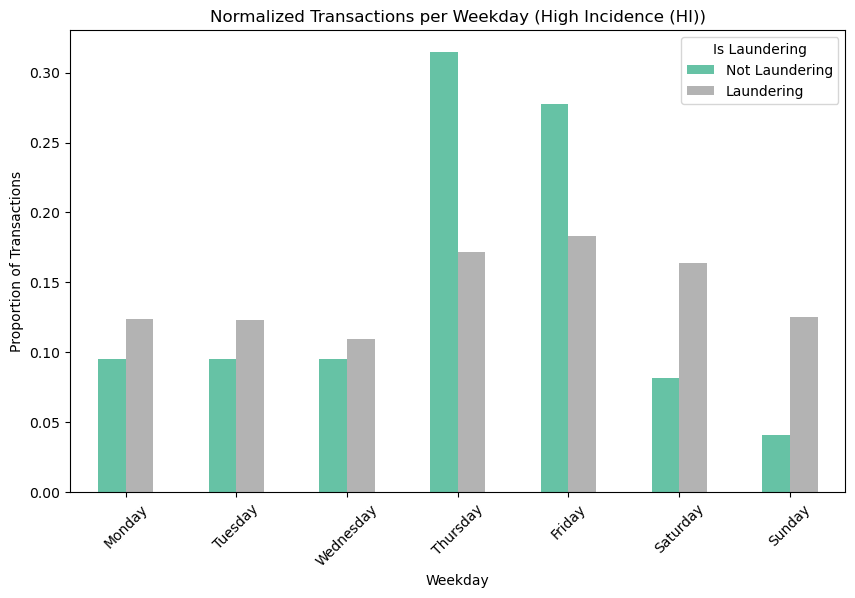

<Figure size 1000x600 with 0 Axes>

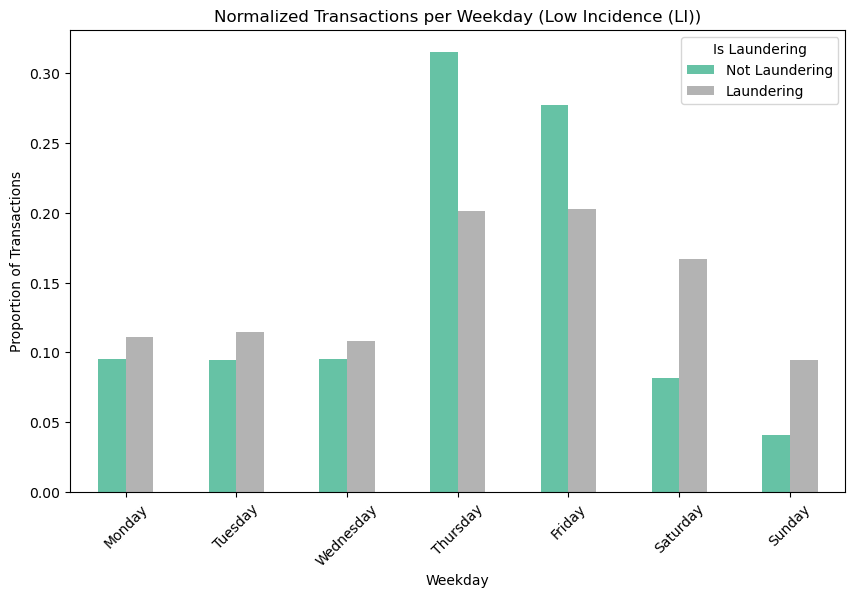

In [32]:
# Function to process dataset and plot
def plot_weekday_distribution(df, dataset_name):
    # Convert Timestamp to datetime and extract weekday
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Weekday'] = df['Timestamp'].dt.day_name()

    # Count transactions per weekday by label (Is Laundering: 0 or 1)
    weekday_counts = df.groupby(['Weekday', 'Is Laundering']).size().unstack()

    # Normalize by column to get percentages per label
    weekday_counts = weekday_counts.div(weekday_counts.sum(axis=0), axis=1)

    # Plot stacked bar chart
    plt.figure(figsize=(10, 6))
    weekday_counts.loc[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]].plot(
        kind='bar', stacked=False, colormap='Set2', figsize=(10, 6)
    )
    plt.title(f"Normalized Transactions per Weekday ({dataset_name})")
    plt.ylabel("Proportion of Transactions")
    plt.xlabel("Weekday")
    plt.legend(title="Is Laundering", labels=["Not Laundering", "Laundering"])
    plt.xticks(rotation=45)
    plt.show()

# Apply function to both datasets
plot_weekday_distribution(df_hi, "High Incidence (HI)")
plot_weekday_distribution(df_li, "Low Incidence (LI)")


In [20]:
# Convert Timestamp to datetime and extract weekday
df_hi['Timestamp'] = pd.to_datetime(df_hi['Timestamp'])
df_hi['Weekday'] = df_hi['Timestamp'].dt.day_name()

# Count transactions per weekday by label (Is Laundering: 0 or 1)
weekday_counts = df_hi.groupby(['Weekday', 'Is Laundering']).size().unstack()

In [27]:
weekday_counts.head()
weekday_counts = weekday_counts.div(weekday_counts.sum(axis=0), axis=1)
weekday_counts

Is Laundering,0,1
Weekday,,
Friday,0.142969,0.065936
Monday,0.142876,0.130072
Saturday,0.142774,0.199892
Sunday,0.142620,0.305066
Thursday,0.142986,0.054527
Tuesday,0.142877,0.129437
Wednesday,0.142898,0.115070


In [ ]:
weekday_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Friday to Wednesday
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       7 non-null      int64
 1   1       7 non-null      int64
dtypes: int64(2)
memory usage: 168.0+ bytes
